<h3>Problem Statement: giải quyết tất cả các khoản vay mua nhà thông qua tự động hóa quy trình đủ điều kiện cho vay </h3>

<p><b>About Company</b>: Công ty X tập trung vào tất cả các khoản vay mua nhà. Họ có mặt ở khắp các khu vực thành thị, bán thành thị và nông thôn. Khách hàng đăng ký khoản vay mua nhà lần đầu tiên sau khi công ty đó xác nhận xem khách hàng có đủ điều kiện vay vốn hay không.</p>

<p><b>Problem</b>: 
    Công ty muốn tự động hóa quy trình đủ điều kiện cho vay (thời gian thực) dựa trên chi tiết khách hàng được cung cấp trong khi điền vào biểu mẫu đăng ký trực tuyến. Tập dữ liệu này chứa lịch sử khoản vay của các khách hàng trước đây của công ty. .</p>


<h3><strong>GROUP MEMBER</strong></h3>
    <li> Nguyễn Diệu Hương
    <li> Nguyễn Tiến Hùng
    <li> Nguyễn Thế Dũng
    <li> Nguyễn Mai Linh
    <li> Lương Quân Minh 

<p><b>About the Dataset:  </b></p>
    <li><b>Loan_ID</b>                    - Mã giao dịch vay  </li>
    <li><b>Gender</b>                   - Giới tính của khách hàng (Nam / Nữ) </li>
    <li><b>Married</b>                    - Tình trạng hôn nhân của khách hàng (Đã kết hôn / Chưa kết hôn) </li>
    <li><b>Dependents</b>                   - Số lượng người phụ thuộc kèm theo của khách hàng</li>
    <li><b>Education</b>                    - Trình độ học vấn của người đi vay (Tốt nghiệp hoặc Chưa tốt nghiệp)  </li>
    <li><b>Self_Employed</b>                   - Nghề nghiệp của khách hàng (Kinh doanh tự do hoặc Không) </li>
    <li><b>ApplicantIncome</b>                    - Thu nhập của người đi vay  </li>
    <li><b>CoapplicantIncome</b>                   - Thu nhập của người cùng đi vay </li>
    <li><b>LoanAmount</b>                    - Số tiền vay theo hàng nghìn  </li>
    <li><b>Loan_Amount_Term</b>                   - Thời hạn của khoản vay theo tháng </li>
    <li><b>Credit_History</b>                    - Lịch sử tín dụng đáp ứng đầy đủ tiêu chuẩn  </li>
    <li><b>Property_Area</b>                   - Khu vực tài sản khách hàng sở hữu (Thành thị / Bán thành thị / Nông thôn) </li>
    <li><b>Loan_Status</b>                   - Tình trạng duyệt vay (Có hoặc Không) </li>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat
import imblearn
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import matplotlib
import shap
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from scipy.stats import zscore
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
data_loan = pd.read_csv('company-x-loan.csv')
data_loan.info()
data_loan.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
print(data_loan.shape)
data_loan.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<h3>Dataset Description:</h3>
There are 614 observations in the dataset
<p><b>There are 13 variables in this data set:</b></p>
    <li>8 categorical variables  </li>
    <li>4 continuous variables    </li>
    <li>1 variable to accommodate the loan ID  </li>

Separate categorical and Continuous feature

In [4]:
cat = [i for i in data_loan.columns if data_loan[i].nunique() < 11]
cont = [i for i in data_loan.columns if data_loan[i].nunique() >= 11 and i!='Loan_ID']
print(cat)
print(cont)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [5]:
# Statistics on Numerical data......
round(data_loan.describe(exclude = 'object'), 2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


In [6]:
# Statistics on Categorical data
round(data_loan.describe(exclude = ['float', 'int64']),2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

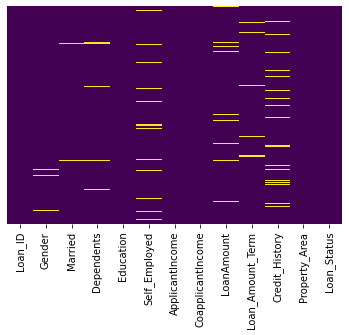

In [7]:
sns.heatmap(data_loan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

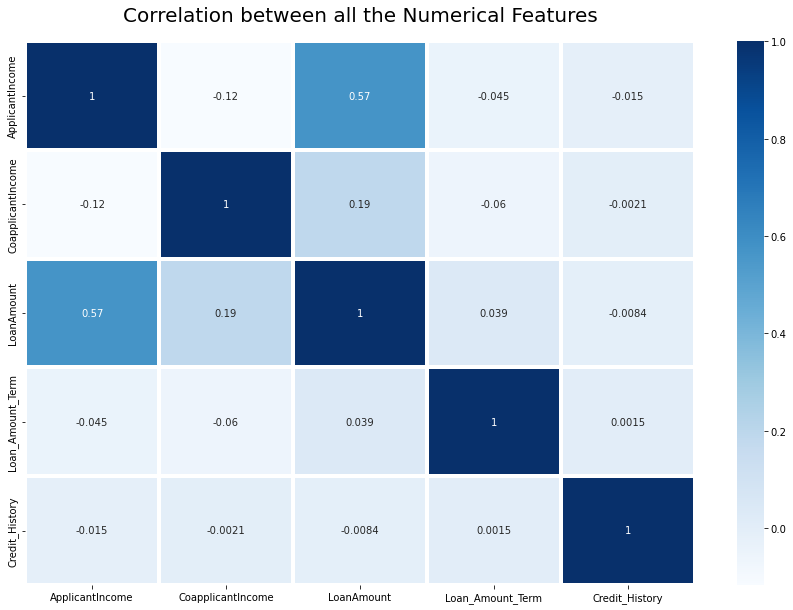

In [8]:
corrmat = data_loan.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(15,10))
plt.title("Correlation between all the Numerical Features", size=20, pad=20)
#plot heat map
g=sns.heatmap(data_loan[top_corr_features].corr(),annot=True,cmap="Blues",linewidths=3.5,
    linecolor='white')

In [9]:
# Changing the Loan Status to 0 and 1 (Hidden Input/Output)
data_loan["Loan_Status"] = data_loan["Loan_Status"].map({"Y":0, "N":1})

<p><b>CATEGORICAL VARIABLE</b></p>

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

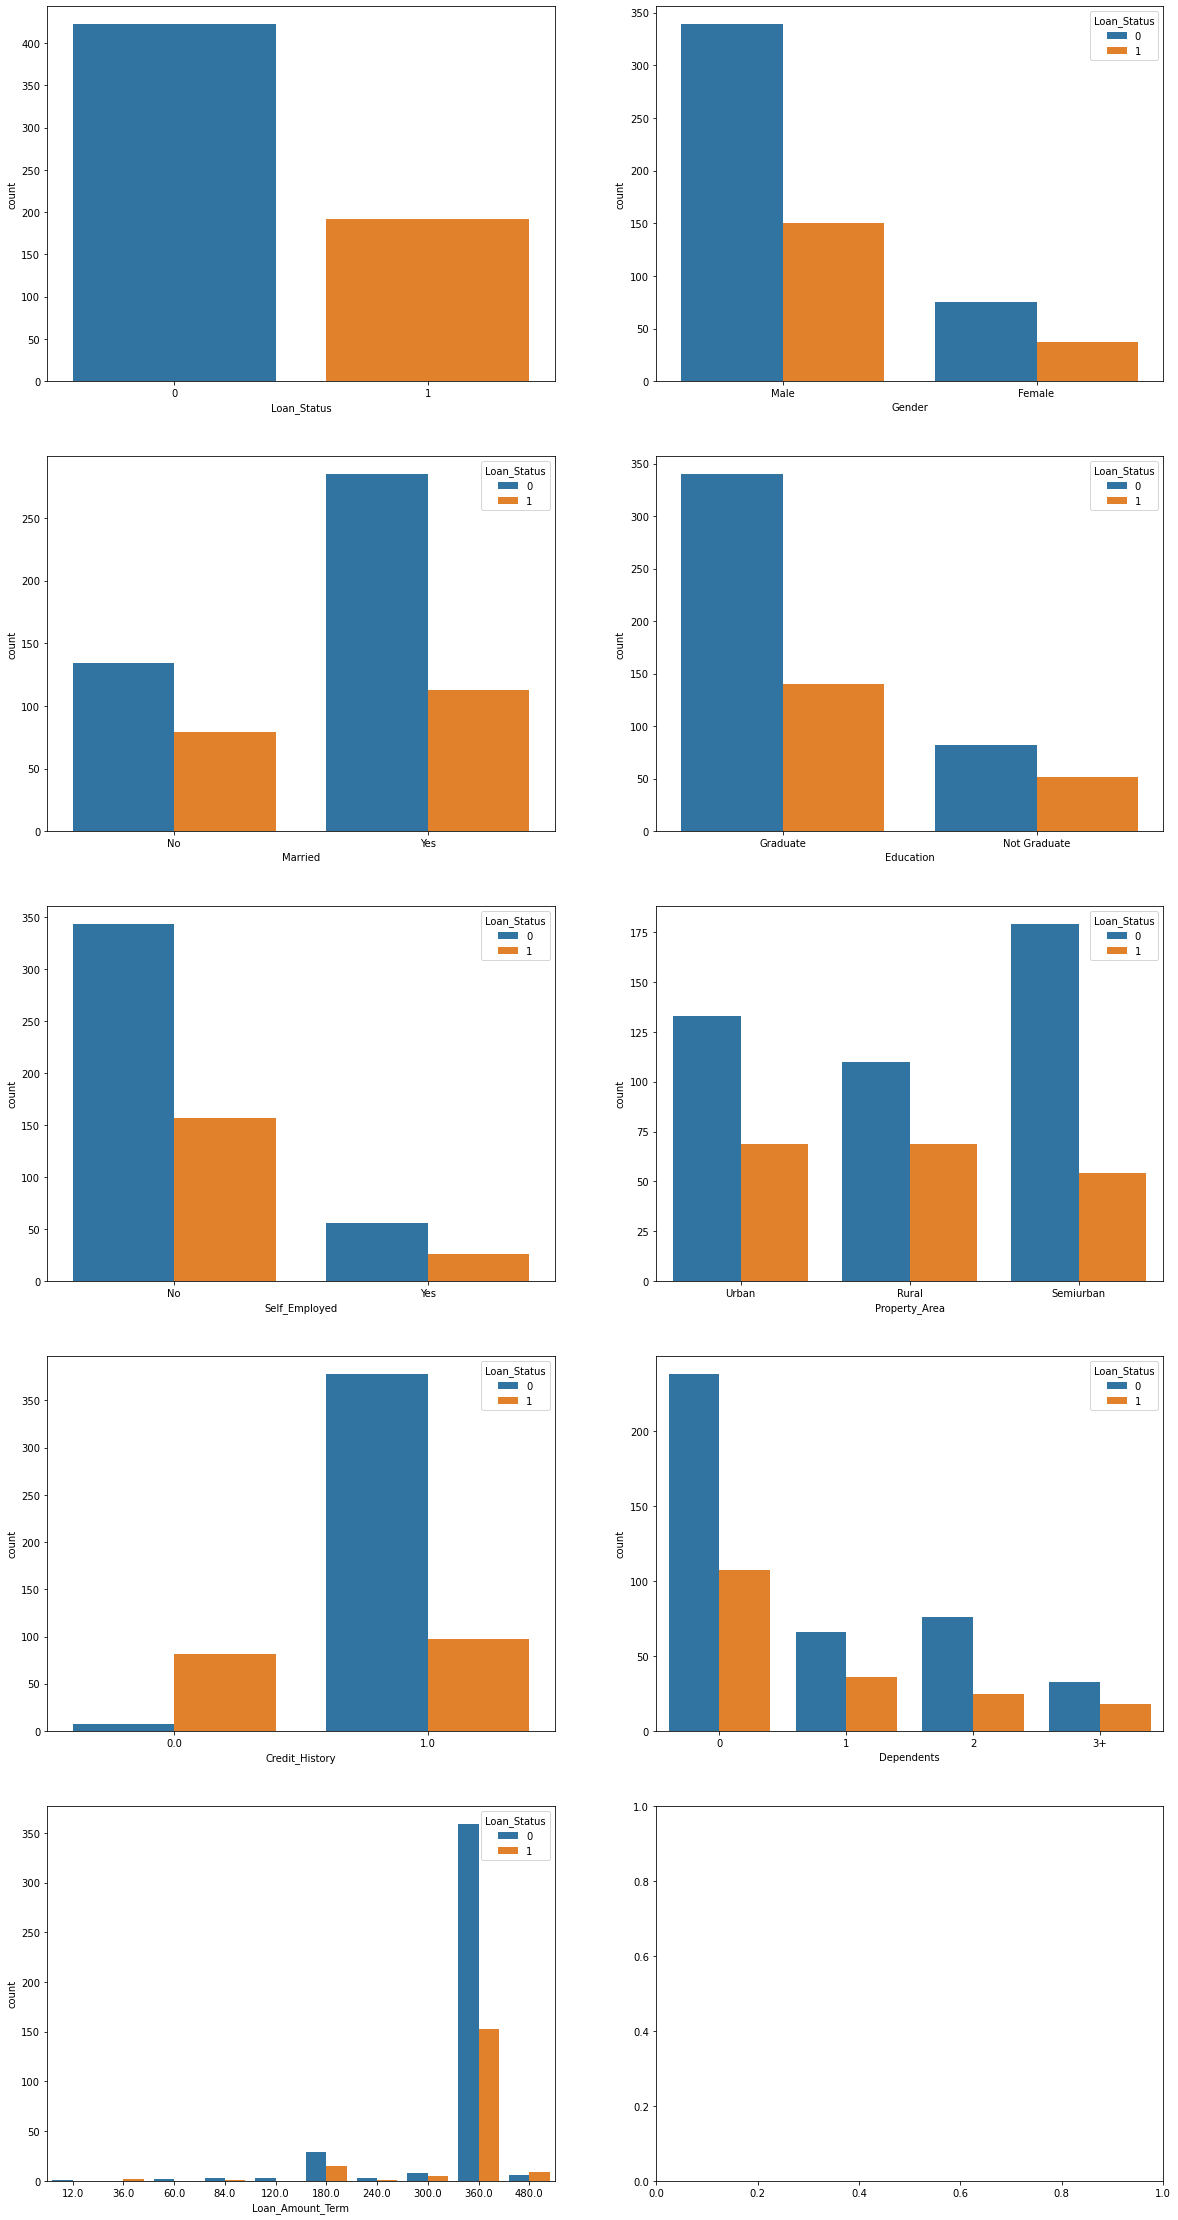

In [10]:
fig,ax = plt.subplots(5,2,figsize=(20,40))
sns.countplot('Loan_Status',data=data_loan,ax=ax[0][0])
sns.countplot('Gender',hue='Loan_Status', data=data_loan,ax=ax[0][1])
sns.countplot('Married',hue='Loan_Status', data=data_loan,ax=ax[1][0])
sns.countplot('Education',hue='Loan_Status', data=data_loan,ax=ax[1][1])
sns.countplot('Self_Employed',hue='Loan_Status', data=data_loan,ax=ax[2][0])
sns.countplot('Property_Area',hue='Loan_Status', data=data_loan,ax=ax[2][1])
sns.countplot('Credit_History',hue='Loan_Status',data=data_loan,ax=ax[3][0])
sns.countplot('Dependents',hue='Loan_Status',data=data_loan,ax=ax[3][1])
sns.countplot('Loan_Amount_Term',hue='Loan_Status',data=data_loan,ax=ax[4][0])

Thứ nhất, về tình trạng nợ, có thể thấy số lượng khách hàng nợ xấp xỉ quanh mức 200 trên tổng số hơn 420 khách hàng, tỷ lệ quanh mức 45%

Theo giới tính, có thể thấy rõ độ chênh lệch khi số khách hàng là nam giới vượt trội so với nữ giới, ở mức quanh 500 khách hàng - gấp 5 lần so với nữ.

Đối với thống kê về tình trạng hôn nhân, những khách hàng đã kết hôn chiếm đa số với gần 400 khách, so với hơn 200 khách hàng còn độc thân. Điều này có thể giải thích khi kết hôn thì nhu cầu về tiêu dùng cũng như sinh hoạt đòi hỏi họ cần nhiều tiền hơn để trang trải. 

Những người đã tốt nghiệp cũng chiếm tỷ trọng cao hơn so với nhóm khách hàng chưa tốt nghiệp.

Đối với nghề nghiệp của khách hàng, số lượng khách hàng kinh doanh tự do chiếm tỷ trọng chỉ bằng 1/5 lần nhóm khách hàng còn lại là thuộc các nhóm nghề khác

Theo khu vực tài sản sở hữu của khách hàng, không có nhiều sự chênh lệch lớn giữa các khu vực thành thị, nông thôn và bán thành thị, trong đó: bán thành thị là khu vực có nhiều người sở hữu tài sản nhất.

Theo lịch sử tín dụng của các khách hàng, các khách hàng có lịch sử 1.0 chiếm đa số với gần 500 khách hàng

Về số người phụ thuộc theo khách hàng, có thể thấy phần lớn khách hàng không có người phụ thuộc kèm với gần 350 người, nhóm khách hàng có từ 3 người phụ thuộc kèm chỉ chiếm 50 khách hàng.

Đối với mức điều khoản vay, các khách hàng sử dụng nhất là 360 với hơn 500 khách hàng, vượt trội hơn tất cả các mức còn lại.

<p><b>NUMERICAL VARIABLE</b></p>

In [11]:
data_loan[['ApplicantIncome'
           ,'CoapplicantIncome'
           ,'LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


Đối với trường “ApplicantIncome”: có 614 quan sát
mức thu nhập trung bình là 5403,
người có thu nhập thấp nhất là 1500,
người có thu nhập cao nhất là 81000,
Có sự chênh lệch lớn trong nhóm ApplicantIncome, khi độ lệch chuẩn lớn lên tới 6109, khoảng cách thu nhập của người ít nhất và cao nhất là gần 80000%

Đối với trường “CoApplicantIncome”: có 614 quan sát
mức thu nhập trung bình là 1621,
người có thu nhập thấp nhất là 0,
người có thu nhập cao nhất là 41667,
Độ chênh lệch ở CoApplicantIncome thấp hơn so với ApplicantIncome khi độ lệch chuẩn chỉ là 2926, tuy nhiên đây vẫn là một mức khá lớn, tỷ lệ chênh lệch giữa người thu nhập cao nhất và thấp nhất cũng rất lớn do người thu nhập thấp nhất thậm chí không hề có thu nhập .

Đối với trường “LoanAmount”: có 592 quan sát
Trung bình khách hàng có khoản vay dao động quanh mức 146
Mức vay thấp nhất là 9
Mức vay cao nhất là 700

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

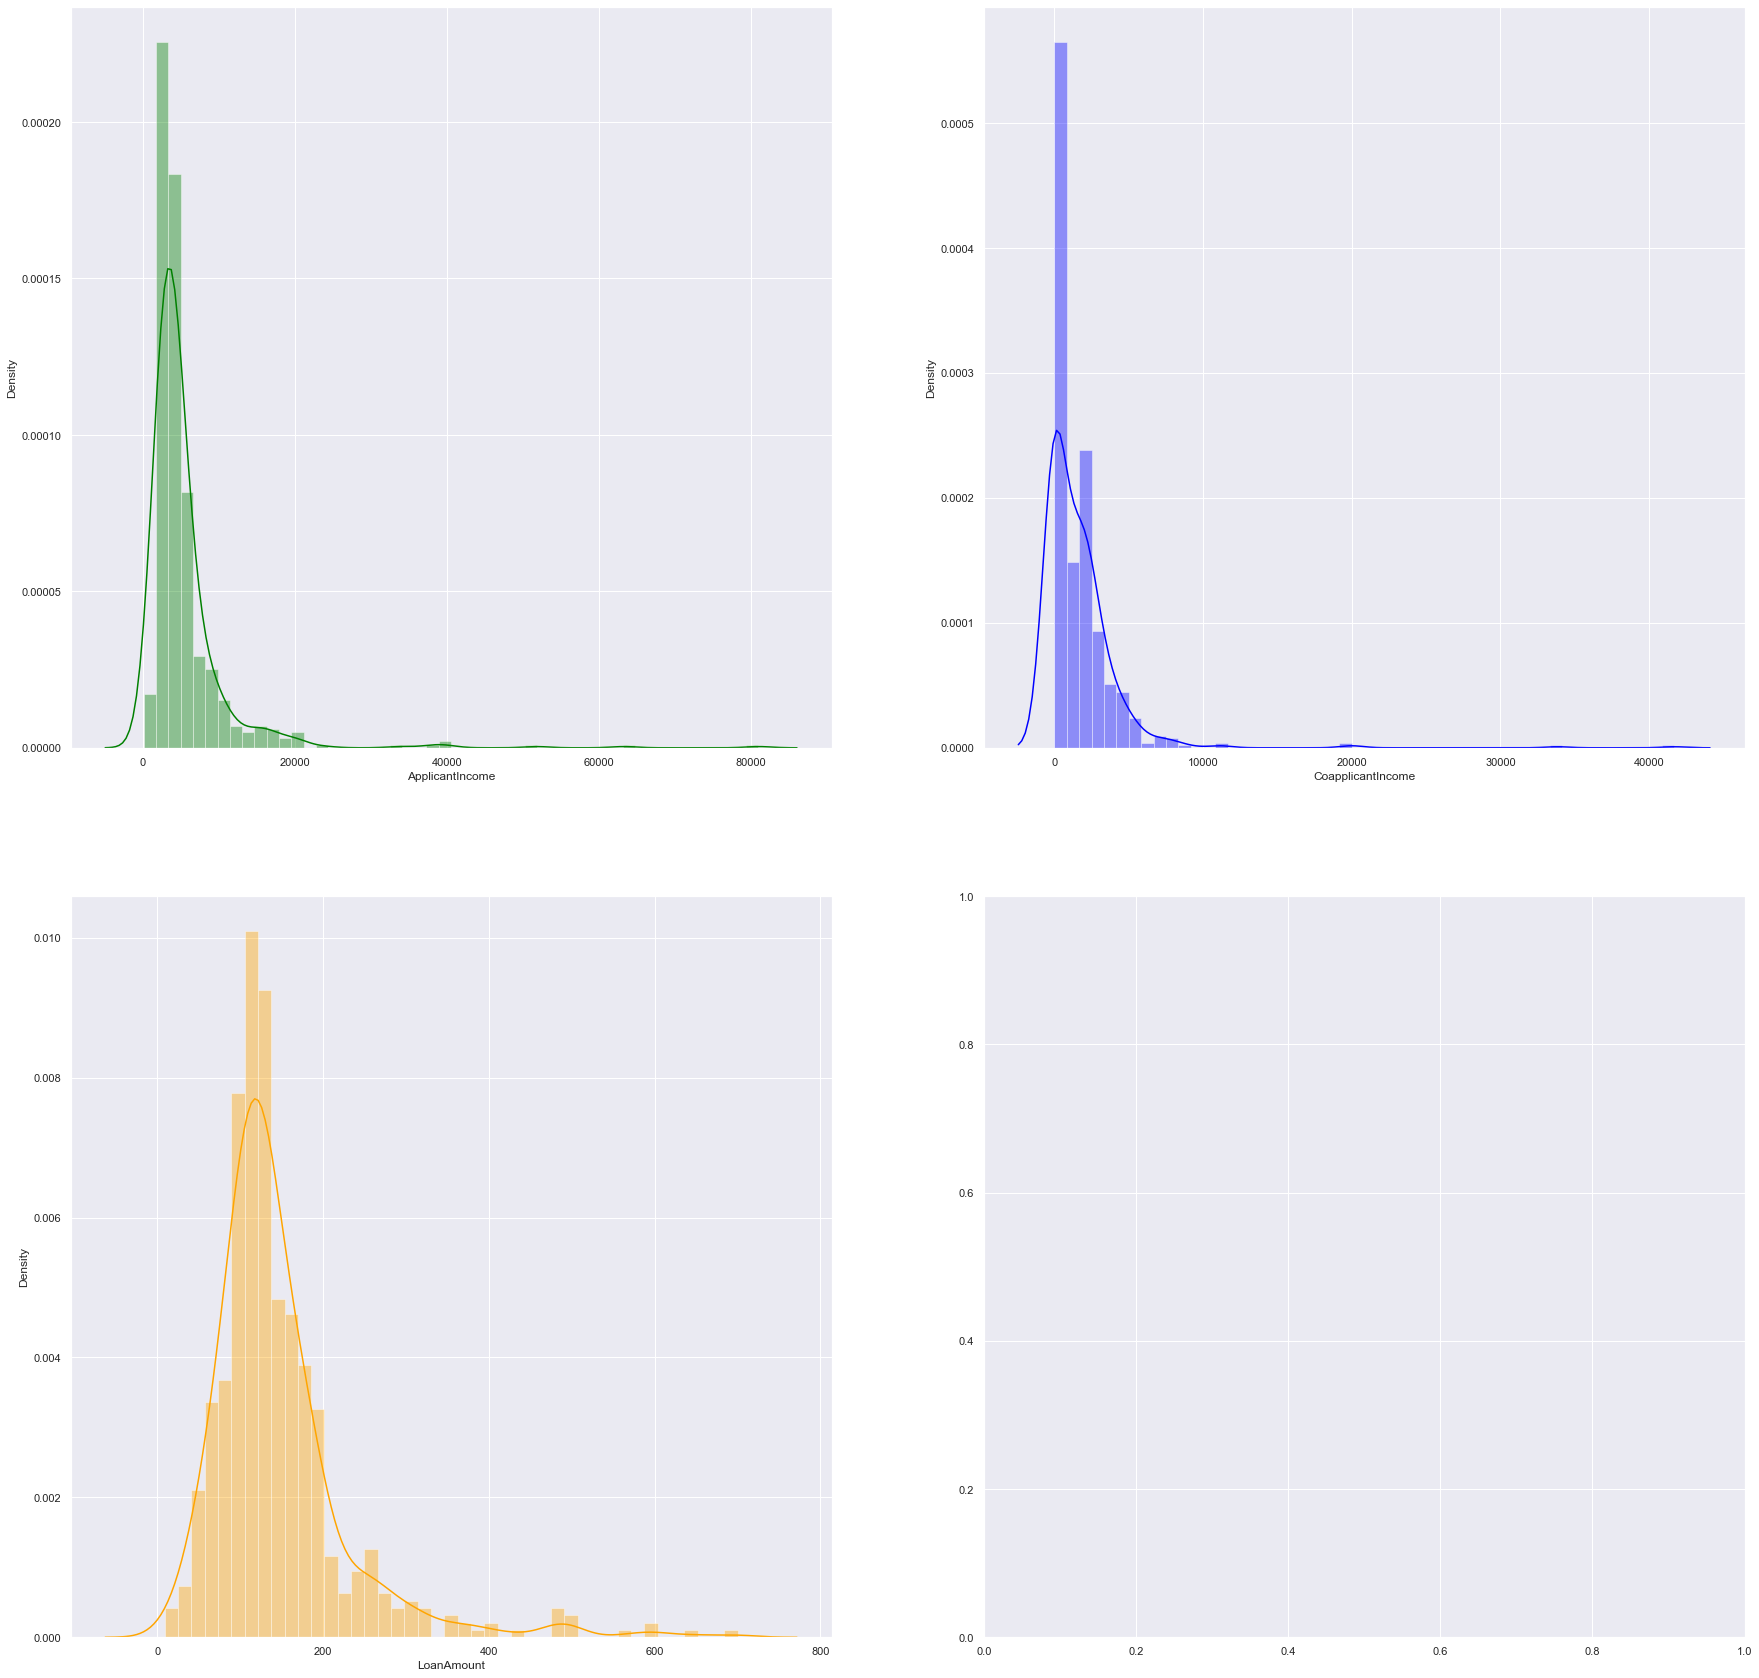

In [12]:
sns.set(style="darkgrid")
fig,ax = plt.subplots(2,2,figsize=(30,30))

sns.distplot(data_loan['ApplicantIncome'],ax=ax[0][0],color='green')
sns.distplot(data_loan['CoapplicantIncome'],ax=ax[0][1],color='blue')
sns.distplot(data_loan['LoanAmount'],ax=ax[1][0],color='orange')

Biểu đồ thứ nhất cho thấy mức độ phân bố thu nhập của trường ApplicantIncome, tập trung chủ yếu ở mức <10000, với đỉnh nằm quanh mức 4000-6000

Biểu đồ thứ 2 là phân bố thu nhập của trường CoapplicantIncome, những người không có thu nhập chiếm tỷ trọng lớn nhất lên tới gần 300 người , nhóm còn lại có thu nhập quanh mức <5000. Điều này chứng tỏ, đa phần Coapplicant là những dependant của applicant (những người phụ thuộc vào nguồn thu nhập của applicant)

Với LoanAmount, mức vay phổ biến nhất ở quanh mức 0-200 với đỉnh là xấp xỉ 100. Các khoản vay này dường như chỉ mang tính ngắn hạn và nhất thời.

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


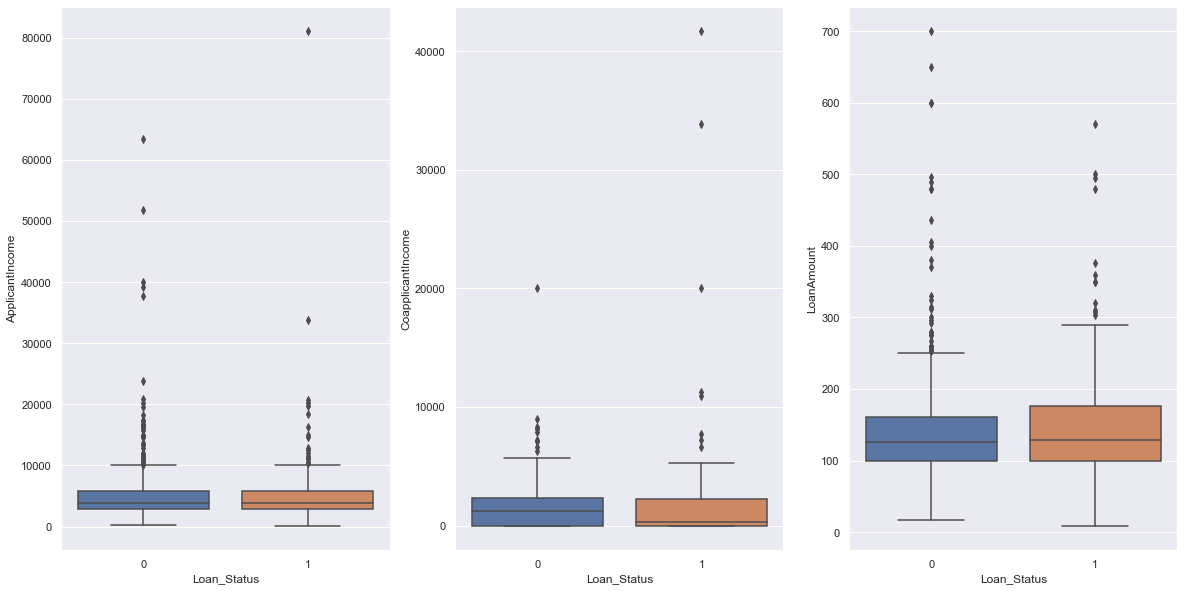

In [13]:
fig,axes = plt.subplots(1,3,figsize = (20,10))

for idx,cat_col in enumerate(cont):
    sns.boxplot(y = cat_col,data = data_loan, x = 'Loan_Status', ax = axes[idx])

print(data_loan[cont].describe())
plt.subplots_adjust(hspace=1)

Biểu đồ thứ nhất cho thấy Applicant cả có nợ và không trong tình trạng nợ có thu nhập chủ yếu từ 3000-5000. 

Tương tự như vậy, ở biểu đồ thứ 2, Coapplicant cả có nợ và không trong tình trạng nợ có thu nhập chủ yếu <1000

Đối với LoanAmount, những người chưa trong trạng thái nợ hay Loan_Status là 0 vay chủ yếu quanh mức 100-160, và rải rác ở các mức còn lại, trong khi những người có Loan_Status là 1 hay đang nợ thì vay quanh mức 100 - 200 và ít có xu hướng vay ở các khoản cao hơn. Điều này có thể giải thích do họ đang trong trạng thái nợ nên lo sợ khả năng chi trả nếu vay quá nhiều. 

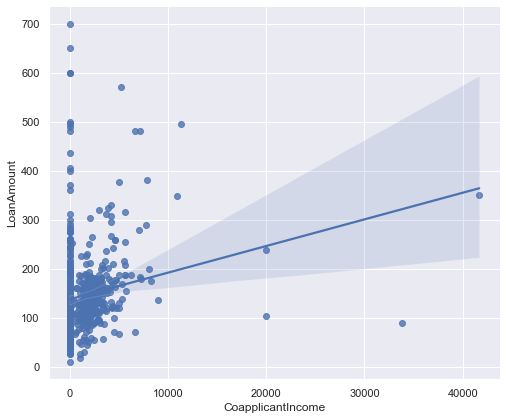

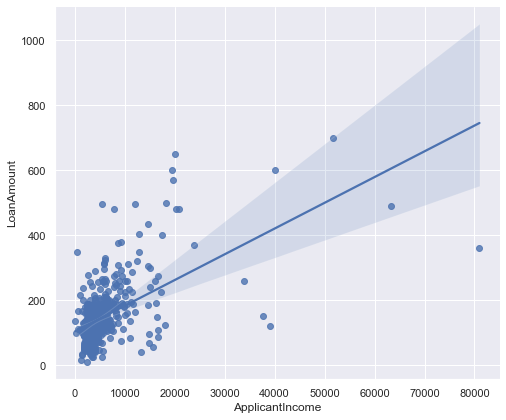

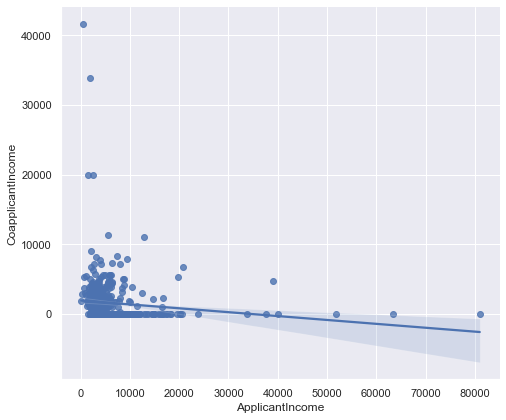

In [14]:
sns.lmplot(x='CoapplicantIncome',y='LoanAmount'
           ,data=data_loan,height=6, aspect=1.2)
sns.lmplot(x='ApplicantIncome',y='LoanAmount'
           ,data=data_loan,height=6, aspect=1.2)
sns.lmplot(x='ApplicantIncome',y='CoapplicantIncome'
           ,data=data_loan,height=6, aspect=1.2)


<p><b>Processing Data:</b></p>

<p><i>Dropping identifier columns:

In [15]:
data_loan = data_loan.drop(['Loan_ID'], axis = 1)

<p><i>Imputing null values:

Thống kê số lượng và tỉ lệ giá trị null ở mỗi cột trường dữ liệu

In [16]:
data_loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
round((data_loan.isnull().sum() * 100)/(data_loan.shape[0]),2)

Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [18]:
data_loan ['Gender'] = data_loan ['Gender'].fillna(data_loan['Gender'].mode()[0])
data_loan ['Married'] = data_loan ['Married'].fillna(data_loan['Married'].mode()[0])
data_loan ['Dependents'] = data_loan ['Dependents'].fillna(data_loan['Dependents'].mode()[0])
data_loan ['Self_Employed'] = data_loan ['Self_Employed'].fillna(data_loan['Self_Employed'].mode()[0])
data_loan ['Loan_Amount_Term'] = data_loan ['Loan_Amount_Term'].fillna(data_loan['Loan_Amount_Term'].mode()[0])
data_loan ['Credit_History'] = data_loan ['Credit_History'].fillna(data_loan['Credit_History'].mode()[0])

data_loan ['LoanAmount'] = data_loan ['LoanAmount'].fillna(data_loan['LoanAmount'].mean())

Ở phần này chúng em xử lý các giá trị null bằng cách thay giá trị null của categorical variable bằng mode của chúng và giá trị null của continuous variable bằng mean của chúng

<AxesSubplot:>

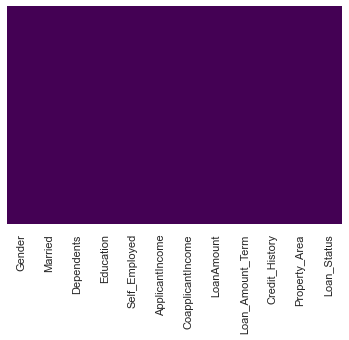

In [19]:
sns.heatmap(data_loan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<p><i>Encoding Object type columns

In [20]:
o = OrdinalEncoder()
l = LabelEncoder()
for i in data_loan.columns:
    if data_loan[i].dtypes == 'O' and i != 'Loan_Status':
        data_loan[i] = o.fit_transform(data_loan[i].values.reshape(-1,1))
data_loan['Loan_Status'] = l.fit_transform(data_loan['Loan_Status'])

<p><i>Removing Outliers

In [21]:
def threhold(z,d):
    for i in np.arange(3,5,0.2):
        data = d.copy()
        data = data[(z < i).all(axis = 1)]
        loss = (d.shape[0] - data.shape[0]) / d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

z = np.abs(zscore(data_loan))
threhold(z,data_loan)

With threshold 3.0 data loss is 6.03%
With threshold 3.2 data loss is 5.37%
With threshold 3.4 data loss is 5.37%
With threshold 3.6 data loss is 4.72%
With threshold 3.8 data loss is 4.72%
With threshold 4.0 data loss is 4.23%
With threshold 4.2 data loss is 3.26%
With threshold 4.4 data loss is 2.77%
With threshold 4.6 data loss is 2.77%
With threshold 4.8 data loss is 2.28%


In [22]:
data_loan = data_loan[(z < 3.6).all(axis=1)]

We use threshold as 3.6 because data is expensive and we already have less of data.

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       585.000000         585.000000  585.000000
mean       4756.025641        1421.982769  137.653107
std        3161.724275        1693.294145   61.212498
min         150.000000           0.000000    9.000000
25%        2833.000000           0.000000  100.000000
50%        3750.000000        1229.000000  128.000000
75%        5667.000000        2250.000000  160.000000
max       23803.000000       10968.000000  436.000000


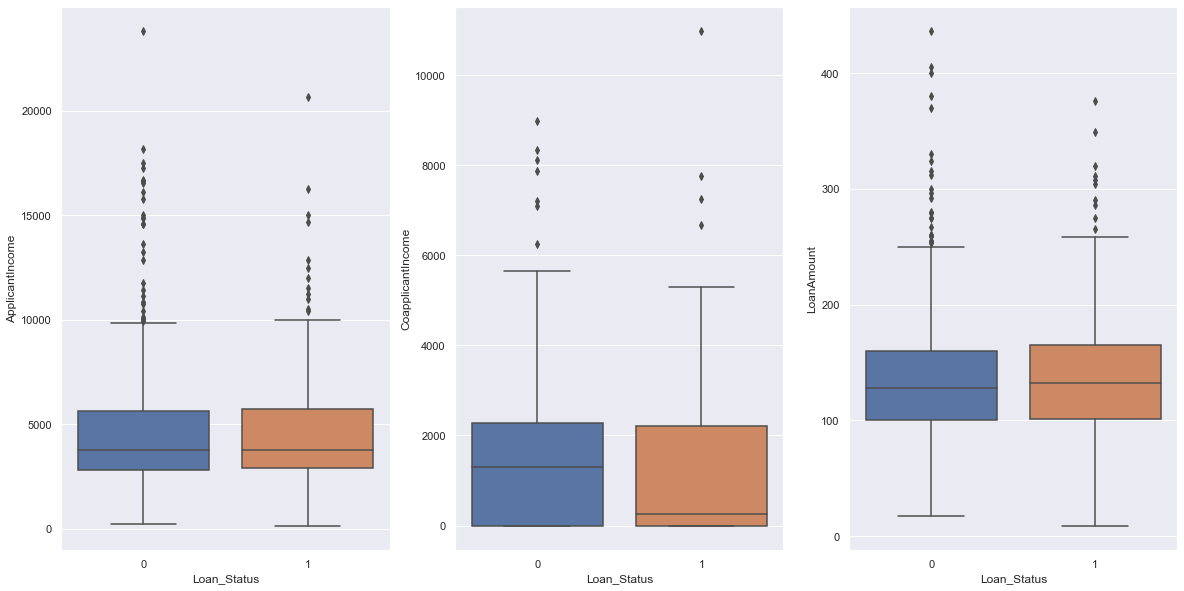

In [23]:
fig,axes = plt.subplots(1,3,figsize = (20,10))

for idx,cat_col in enumerate(cont):
    sns.boxplot(y = cat_col,data = data_loan, x = 'Loan_Status', ax = axes[idx])

print(data_loan[cont].describe())
plt.subplots_adjust(hspace=1)

<p><i>Removing skewness

In [24]:
for i in cont:
    print(i,data_loan[i].skew())

ApplicantIncome 2.269125322469563
CoapplicantIncome 1.535617215156561
LoanAmount 1.3911795368242277


In [25]:
data_loan['CoapplicantIncome']=np.cbrt(data_loan['CoapplicantIncome'])
data_loan['LoanAmount']=np.cbrt(data_loan['LoanAmount'])
data_loan['ApplicantIncome']=np.log(data_loan['ApplicantIncome'])

In [26]:
for i in cont:
    print(i,data_loan[i].skew())

ApplicantIncome -0.1208366976454243
CoapplicantIncome -0.013315755072708253
LoanAmount 0.08706356652020618


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

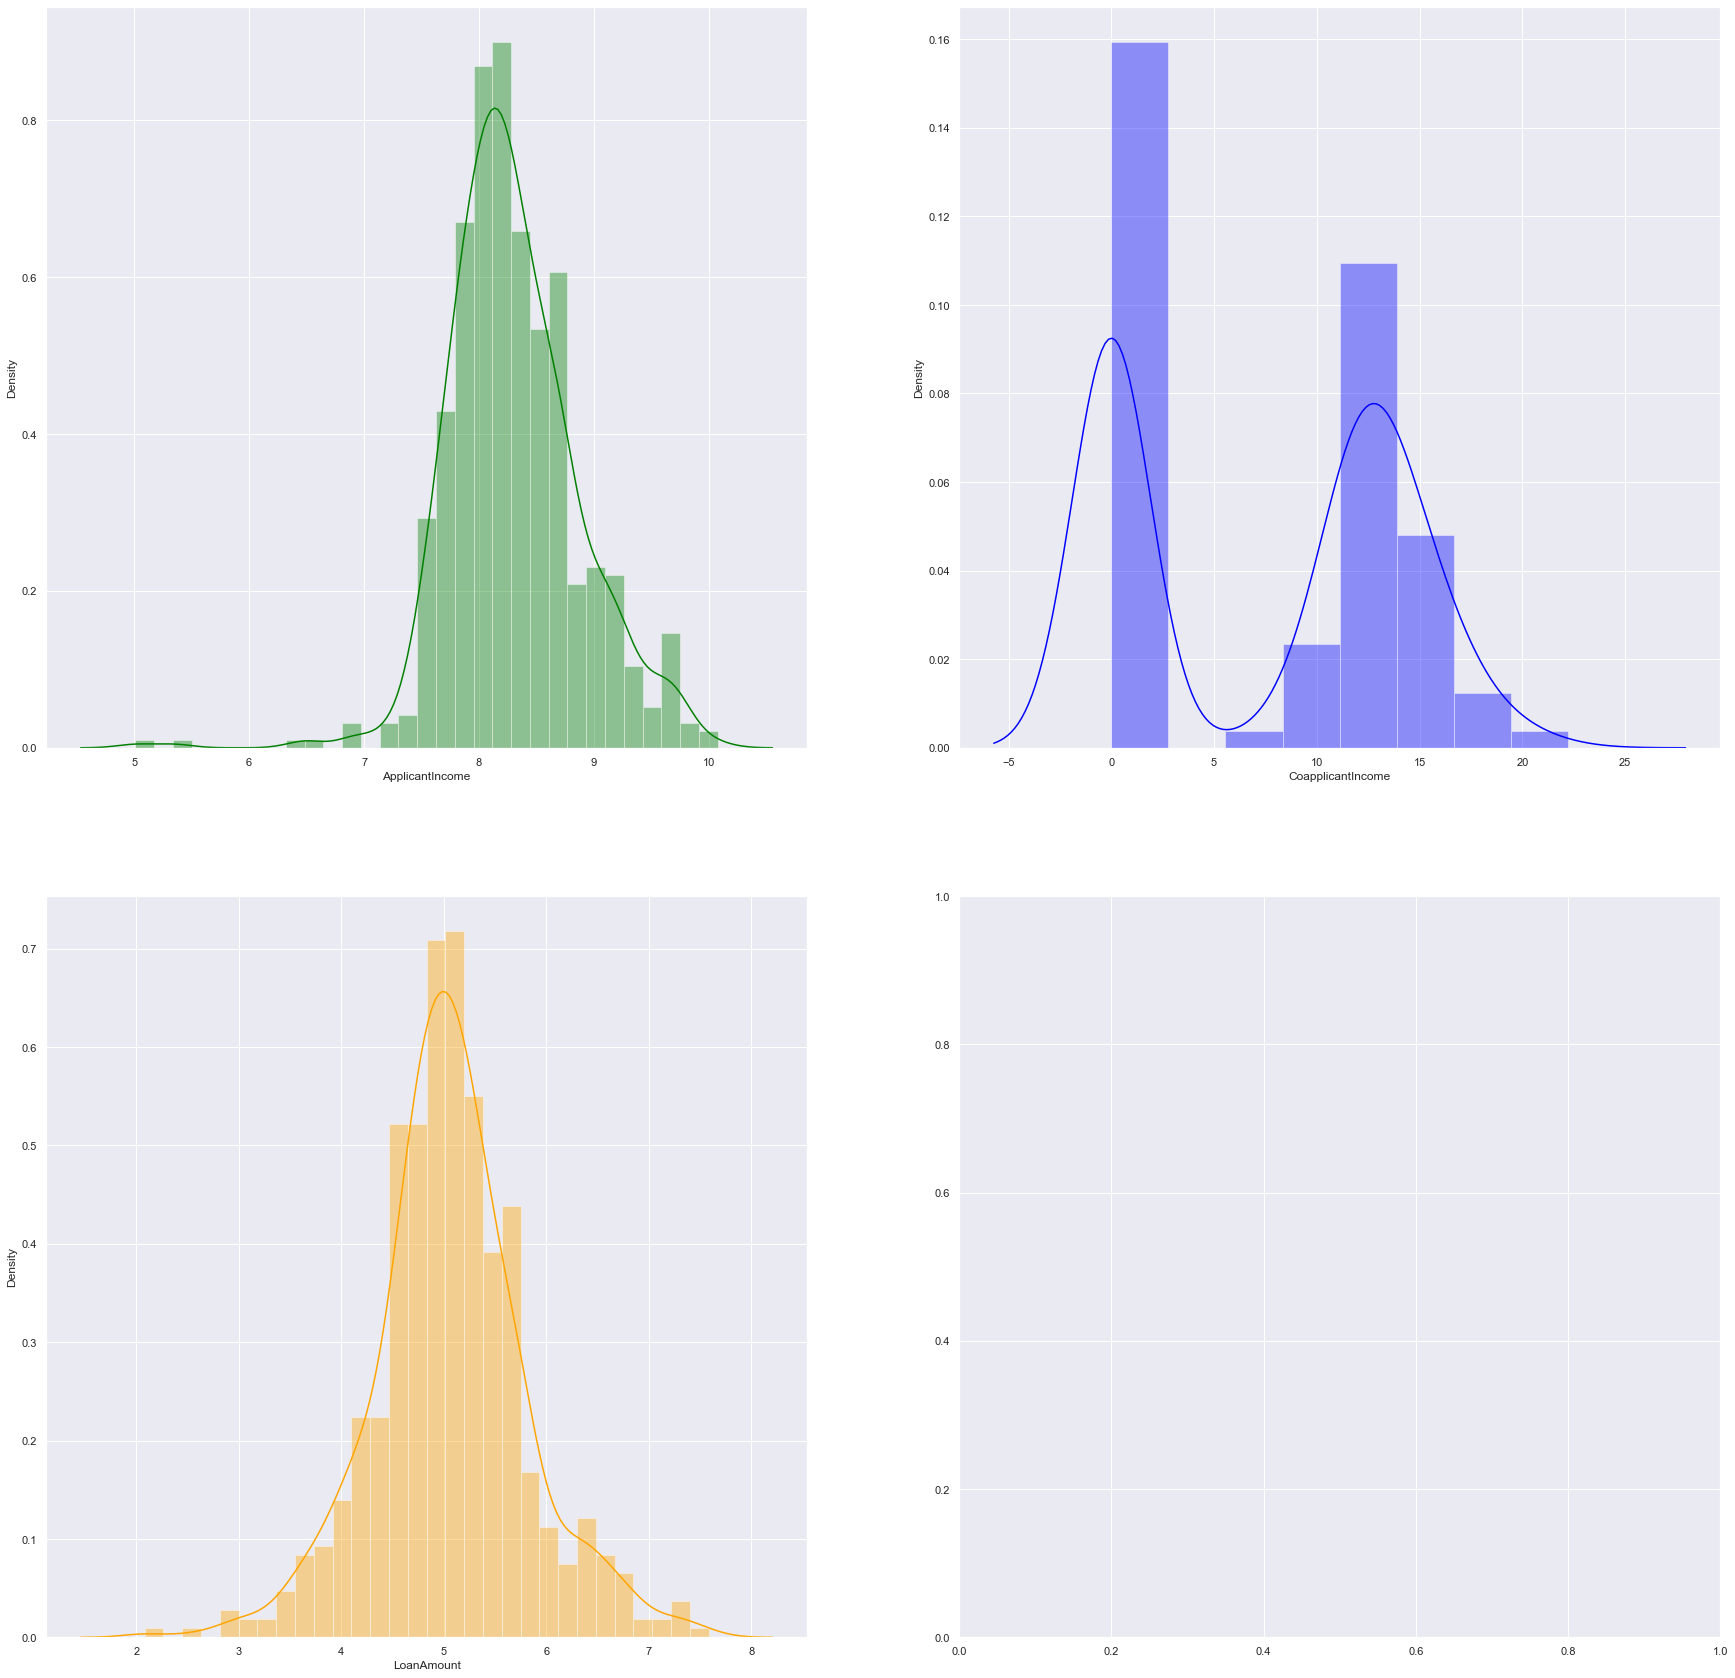

In [27]:
sns.set(style="darkgrid")
fig,ax = plt.subplots(2,2,figsize=(30,30))

sns.distplot(data_loan['ApplicantIncome'],ax=ax[0][0],color='green')
sns.distplot(data_loan['CoapplicantIncome'],ax=ax[0][1],color='blue')
sns.distplot(data_loan['LoanAmount'],ax=ax[1][0],color='orange')

Sau khi lược bỏ skewness, Ở biểu đồ thứ nhất, density của ApplicantIncome tập trung chủ yếu ở nhóm 7,5 - 9, với đỉnh density quanh nhóm 8 là xấp xỉ 0,9

Đối với CoapplicantIncome, mức 0 có density cao nhất đạt 0,16, tiếp đến là 10-15 với density dao động từ 0.02 đến 0.1

Với biểu đồ thứ 3, ta có thể thấy density dao động quanh các khoảng LoanAmount từ 4-6 là chủ yếu với đỉnh là 0,7 ở nhóm 6

<p><i>Separating dependent and independent features

In [28]:
x = data_loan.copy()
x.drop('Loan_Status',axis = 1, inplace=True)
y = data_loan['Loan_Status']

<p><i>Handling Imbalanced Data

0    405
1    405
Name: Loan_Status, dtype: int64

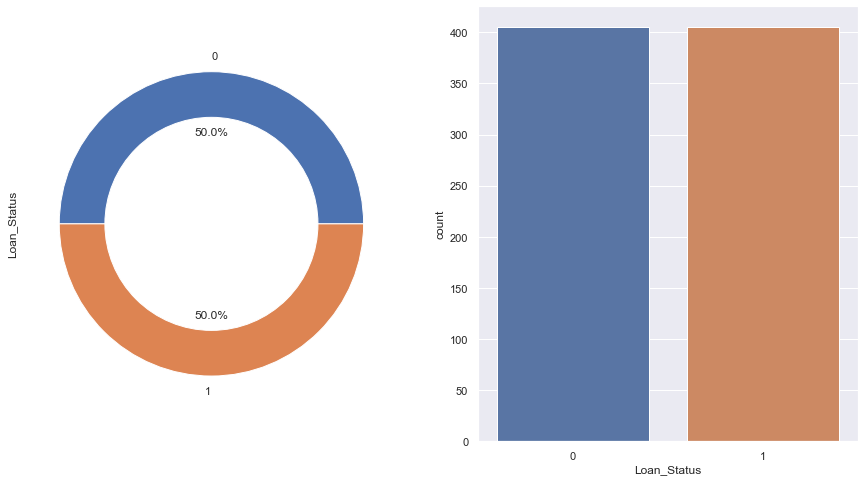

In [29]:
over = SMOTE()
x,y=over.fit_resample(x,y)

plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct = '%1.1f%%')
centre = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

Ở đây nhóm sử dụng phương pháp SMOTE để cân bằng bộ dữ liệu. Phương pháp SMOTE là phương pháp áp dụng K-nearest-neighbor để sinh ra thêm dữ liệu cho tập thiểu số. Cụ thể với mỗi giá trị của tập thiểu số, sử dụng KNN để tìm các giá trị khác của tập thiểu số gần nó, từ hai điểm của tập thiểu số sẽ tạo ra một đoạn thẳng và máy tính sẽ lấy một điểm bất kì trên đoạn thẳng đó là một điểm mới của tập thiểu số.
Phương pháp này tốt hơn oversampling thông thường, chỉ lặp lại các giá trị của tập thiểu số đến khi số lượng bằng tập đa số.

<p><i>Scaling the data using min max scaler

In [30]:
scaler = MinMaxScaler()
xd = scaler.fit_transform(x)
x = pd.DataFrame(xd,columns = x.columns)

<p><b>MODEL TRAINING</b></p>

<p><b>Splitting data into train and test</b></p>

In [31]:
x_train,x_not_train,y_train,y_not_train = train_test_split(x,y,test_size = 0.3, random_state = 42,stratify = y)
print("Train dataset shape: {0}, \nRemaining dataset shape: {1}".format(x_train.shape, x_not_train.shape))

Train dataset shape: (567, 11), 
Remaining dataset shape: (243, 11)


In [32]:
x_val,x_test,y_val,y_test =  train_test_split(x_not_train,y_not_train,test_size = 0.3, random_state = 42,stratify = y_not_train)

<p><b>To evaluate performances of all the models</b></p>

In [33]:
def performance(p,y_test,m,x_test,s):
    print('-----------',m,'-----------')
    print('Accuracy',np.round(accuracy_score(p,y_test),4))
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('AUC_ROC Score',np.round(roc_auc_score(y_test,m.predict_proba(x_test)[:,1]),4))
    print('Confusion Matrix')
    print(confusion_matrix(p,y_test))
    print('Classification Report')
    print(classification_report(p,y_test))

<p><b>Creating a list of models which will be created one by one</b></p>

In [34]:
models=[LogisticRegression()
        ,DecisionTreeClassifier(),
        RandomForestClassifier()]

<p><b>Creates and trains model from the models list</b></p>

In [35]:
def createmodel(trainx,valx,trainy,valy):
    for i in models:
        model = i
        model.fit(trainx,trainy)
        p = model.predict(valx)
        score = cross_val_score(model,x,y,cv = 10)
        performance(p, valy, model, valx, score) 

In [36]:
createmodel(x_train, x_val, y_train, y_val)

----------- LogisticRegression() -----------
Accuracy 0.7647
Mean of Cross Validation Score 0.758
AUC_ROC Score 0.8198
Confusion Matrix
[[77 32]
 [ 8 53]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.71      0.79       109
           1       0.62      0.87      0.73        61

    accuracy                           0.76       170
   macro avg       0.76      0.79      0.76       170
weighted avg       0.80      0.76      0.77       170

----------- DecisionTreeClassifier() -----------
Accuracy 0.7882
Mean of Cross Validation Score 0.7889
AUC_ROC Score 0.7882
Confusion Matrix
[[68 19]
 [17 66]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        87
           1       0.78      0.80      0.79        83

    accuracy                           0.79       170
   macro avg       0.79      0.79      0.79       170
weighted avg       0.79      0.79      0.7

<p><b>Hyperparameter Tuning</b></p>

In [37]:
params={'n_estimators':[100, 200, 300, 400, 500],
            'criterion':['gini','entropty'],
            'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
           'max_features':['int','float','auto','log2']}
g = GridSearchCV(RandomForestClassifier(),params,cv = 10)
g.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropty'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['int', 'float', 'auto', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [38]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
RandomForestClassifier(max_features='log2')
0.8428258145363408


In [39]:
m = g.best_estimator_
m.fit(x_train, y_train)
p = m.predict(x_test)
score = cross_val_score(m, x, y, cv = 10)
performance(p, y_test, m, x_test, score)

----------- RandomForestClassifier(max_features='log2') -----------
Accuracy 0.8493
Mean of Cross Validation Score 0.8519
AUC_ROC Score 0.9358
Confusion Matrix
[[35  9]
 [ 2 27]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.75      0.93      0.83        29

    accuracy                           0.85        73
   macro avg       0.85      0.86      0.85        73
weighted avg       0.87      0.85      0.85        73



<p><b>Finalizing the best Model</b></p>

In [40]:
model= g.best_estimator_

model.fit(x_train, y_train)
p = model.predict(x_test)
score = cross_val_score(model,x,y,cv=10)

In [41]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

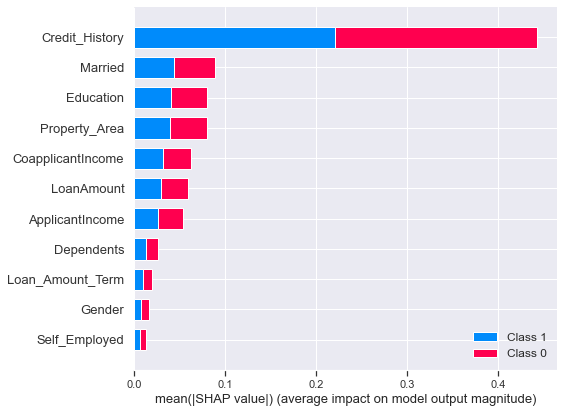

In [42]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

<p><b>Evaluation Metrics</b></p>

In [43]:
performance(p, y_test, model, x_test, score)

----------- RandomForestClassifier(max_features='log2') -----------
Accuracy 0.8493
Mean of Cross Validation Score 0.8469
AUC_ROC Score 0.9238
Confusion Matrix
[[34  8]
 [ 3 28]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        42
           1       0.78      0.90      0.84        31

    accuracy                           0.85        73
   macro avg       0.85      0.86      0.85        73
weighted avg       0.86      0.85      0.85        73



In [44]:
fpred = pd.Series(model.predict_proba(x_test)[:,1])

fpr,tpr,threshold = roc_curve(y_test,fpred)
auc = metrics.roc_auc_score(y_train, fpred)

plt.figure(figsize=(12, 8))
plt.plot(fpr,tpr,color = 'k', label = "ROC, auc="+str(auc))
plt.plot([0,1],[0,1], color = 'b', linestyle = '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend(loc = 4)

ValueError: Found input variables with inconsistent numbers of samples: [567, 73]